In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [28]:
df = pd.read_csv('combinedData.csv')

In [29]:
df.head(10)

,type,rcvTime,sendTime,sender,senderPseudo,messageID,file_name,density_level,pos_x,pos_y,...,acl_noise_y,acl_noise_z,hed_x,hed_y,hed_z,hed_noise_x,hed_noise_y,hed_noise_z,attack?,receiver_id
0,3,50857.17733,50857.17733,993,109935,1873819,traceJSON-1005-1003-A0-50857-14,2,1156.086680,256.364763,...,0.000309,0,0.962749,0.270398,0,3.137089,7.435593,0,1,1005
1,3,50857.63432,50857.63432,981,109815,1874450,traceJSON-1005-1003-A0-50857-14,2,246.409741,208.925867,...,0.000859,0,-0.057958,0.998319,0,12.459642,7.390513,0,0,1005
2,3,50857.83387,50857.83387,987,109875,1874793,traceJSON-1005-1003-A0-50857-14,2,252.853200,220.624920,...,0.000427,0,0.780070,0.625692,0,5.470468,5.925378,0,0,1005
3,3,50858.17733,50858.17733,993,109935,1875517,traceJSON-1005-1003-A0-50857-14,2,1156.086680,256.364763,...,0.000933,0,0.962453,0.271448,0,2.831977,7.199701,0,1,1005
4,3,50858.63432,50858.63432,981,109815,1875983,traceJSON-1005-1003-A0-50857-14,2,246.598417,212.842340,...,0.001700,0,0.073800,0.997273,0,11.724290,7.526817,0,0,1005
5,3,50858.83386,50858.83386,987,109875,1876261,traceJSON-1005-1003-A0-50857-14,2,261.566229,223.378328,...,0.000121,0,0.976596,0.215080,0,3.816796,7.755830,0,0,1005
6,3,50859.17733,50859.17733,993,109935,1876980,traceJSON-1005-1003-A0-50857-14,2,1156.086680,256.364763,...,0.000139,0,0.961484,0.274859,0,2.829607,7.197802,0,1,1005
7,3,50859.63432,50859.63432,981,109815,1877491,traceJSON-1005-1003-A0-50857-14,2,248.574933,218.024563,...,0.000242,0,0.480692,0.876890,0,8.903632,6.390903,0,0,1005
8,3,50859.83387,50859.83387,987,109875,1877779,traceJSON-1005-1003-A0-50857-14,2,272.386382,225.122907,...,0.000472,0,0.992411,0.122963,0,3.110841,8.246349,0,0,1005
9,3,50860.17733,50860.17733,993,109935,1887230,traceJSON-1005-1003-A0-50857-14,2,1156.086680,256.364763,...,0.000001,0,0.944421,0.328738,0,2.902596,6.666439,0,1,1005


In [30]:
df.shape

(820097, 34)

In [31]:
df.columns

Index(['type', 'rcvTime', 'sendTime', 'sender', 'senderPseudo', 'messageID',
       'file_name', 'density_level', 'pos_x', 'pos_y', 'pos_z', 'pos_noise_x',
       'pos_noise_y', 'pos_noise_z', 'spd_x', 'spd_y', 'spd_z', 'spd_noise_x',
       'spd_noise_y', 'spd_noise_z', 'acl_x', 'acl_y', 'acl_z', 'acl_noise_x',
       'acl_noise_y', 'acl_noise_z', 'hed_x', 'hed_y', 'hed_z', 'hed_noise_x',
       'hed_noise_y', 'hed_noise_z', 'attack?', 'receiver_id'],
      dtype='object')

In [32]:
drop_col = ['type', 'file_name', 'density_level', 'pos_z', 'pos_noise_z', 'spd_z', 'spd_noise_z', 'acl_z', 'acl_noise_z', 'hed_z', 'hed_noise_z', 'senderPseudo']
df.drop(drop_col, axis = 1, inplace = True)

In [33]:
df.head(10)

,rcvTime,sendTime,sender,messageID,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,...,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?,receiver_id
0,50857.17733,50857.17733,993,1873819,1156.086680,256.364763,5.091734,4.773193,12.599752,3.969922,...,1.397514,0.440433,0.000883,0.000309,0.962749,0.270398,3.137089,7.435593,1,1005
1,50857.63432,50857.63432,981,1874450,246.409741,208.925867,2.956653,3.164028,-0.660596,4.562380,...,0.481721,-3.326237,0.000124,0.000859,-0.057958,0.998319,12.459642,7.390513,0,1005
2,50857.83387,50857.83387,987,1874793,252.853200,220.624920,4.581064,4.983275,5.968585,5.169782,...,1.418643,1.228780,0.000225,0.000427,0.780070,0.625692,5.470468,5.925378,0,1005
3,50858.17733,50858.17733,993,1875517,1156.086680,256.364763,4.947651,4.700328,13.622957,4.292312,...,0.064019,0.020271,0.000592,0.000933,0.962453,0.271448,2.831977,7.199701,1,1005
4,50858.63432,50858.63432,981,1875983,246.598417,212.842340,3.231777,3.148150,-0.052276,4.379629,...,-0.030983,2.599884,0.000246,0.001700,0.073800,0.997273,11.724290,7.526817,0,1005
5,50858.83386,50858.83386,987,1876261,261.566229,223.378328,4.420047,4.881051,9.568126,2.477790,...,2.279812,0.590429,0.000866,0.000121,0.976596,0.215080,3.816796,7.755830,0,1005
6,50859.17733,50859.17733,993,1876980,1156.086680,256.364763,4.705457,4.645359,13.631607,4.295227,...,-0.098591,-0.030983,0.000440,0.000139,0.961484,0.274859,2.829607,7.197802,1,1005
7,50859.63432,50859.63432,981,1877491,248.574933,218.024563,3.145788,3.278688,2.699759,6.015597,...,0.699028,1.557491,0.000805,0.000242,0.480692,0.876890,8.903632,6.390903,0,1005
8,50859.83387,50859.83387,987,1877779,272.386382,225.122907,4.635787,5.013576,11.613318,1.864545,...,1.507727,0.242132,0.000631,0.000472,0.992411,0.122963,3.110841,8.246349,0,1005
9,50860.17733,50860.17733,993,1887230,1156.086680,256.364763,4.779160,4.672383,13.376911,5.062105,...,-0.025999,-0.009765,0.000004,0.000001,0.944421,0.328738,2.902596,6.666439,1,1005


In [34]:
df.dtypes

rcvTime        float64
sendTime       float64
sender           int64
messageID        int64
pos_x          float64
pos_y          float64
pos_noise_x    float64
pos_noise_y    float64
spd_x          float64
spd_y          float64
spd_noise_x    float64
spd_noise_y    float64
acl_x          float64
acl_y          float64
acl_noise_x    float64
acl_noise_y    float64
hed_x          float64
hed_y          float64
hed_noise_x    float64
hed_noise_y    float64
attack?          int64
receiver_id      int64
dtype: object

In [35]:
df.groupby('attack?').mean()

,rcvTime,sendTime,sender,messageID,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,...,spd_noise_y,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,receiver_id
attack?,,,,,,,,,,,,,,,,,,,,,
0,53376.105132,53376.105132,4686.163410,9.775558e+06,472.210706,649.203273,3.991399,3.989426,-0.726673,0.161121,...,0.000153,-0.002154,-0.022737,0.000712,0.000914,-0.107976,0.028727,13.365933,13.369397,4686.510421
1,53329.191452,53329.191452,4627.824855,9.662182e+06,741.761381,759.045914,4.031156,4.030507,-0.761070,0.503238,...,-0.000210,0.003406,-0.024137,0.000692,0.000896,-0.099360,0.087330,13.793190,13.147968,4627.069613


In [36]:
drop_col_2 = ['sender', 'messageID', 'receiver_id']
df.drop(drop_col_2, axis = 1, inplace = True)

In [37]:
df.head(30)

,rcvTime,sendTime,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,spd_noise_x,spd_noise_y,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?
0,50857.17733,50857.17733,1156.086680,256.364763,5.091734,4.773193,12.599752,3.969922,-0.004829,-0.000775,1.397514,0.440433,8.835000e-04,3.085450e-04,0.962749,0.270398,3.137089,7.435593,1
1,50857.63432,50857.63432,246.409741,208.925867,2.956653,3.164028,-0.660596,4.562380,-0.001120,0.007738,0.481721,-3.326237,1.243960e-04,8.586940e-04,-0.057958,0.998319,12.459642,7.390513,0
2,50857.83387,50857.83387,252.853200,220.624920,4.581064,4.983275,5.968585,5.169782,0.000179,0.001027,1.418643,1.228780,2.252570e-04,4.270990e-04,0.780070,0.625692,5.470468,5.925378,0
3,50858.17733,50858.17733,1156.086680,256.364763,4.947651,4.700328,13.622957,4.292312,-0.005422,-0.001708,0.064019,0.020271,5.921950e-04,9.328570e-04,0.962453,0.271448,2.831977,7.199701,1
4,50858.63432,50858.63432,246.598417,212.842340,3.231777,3.148150,-0.052276,4.379629,-0.000874,0.006038,-0.030983,2.599884,2.461110e-04,1.699655e-03,0.073800,0.997273,11.724290,7.526817,0
5,50858.83386,50858.83386,261.566229,223.378328,4.420047,4.881051,9.568126,2.477790,0.001046,0.000906,2.279812,0.590429,8.662860e-04,1.211060e-04,0.976596,0.215080,3.816796,7.755830,0
6,50859.17733,50859.17733,1156.086680,256.364763,4.705457,4.645359,13.631607,4.295227,-0.005862,-0.001847,-0.098591,-0.030983,4.402810e-04,1.387230e-04,0.961484,0.274859,2.829607,7.197802,1
7,50859.63432,50859.63432,248.574933,218.024563,3.145788,3.278688,2.699759,6.015597,-0.000069,0.005797,0.699028,1.557491,8.051250e-04,2.418750e-04,0.480692,0.876890,8.903632,6.390903,0
8,50859.83387,50859.83387,272.386382,225.122907,4.635787,5.013576,11.613318,1.864545,0.001676,0.000434,1.507727,0.242132,6.306450e-04,4.716410e-04,0.992411,0.122963,3.110841,8.246349,0
9,50860.17733,50860.17733,1156.086680,256.364763,4.779160,4.672383,13.376911,5.062105,-0.005866,-0.001848,-0.025999,-0.009765,3.720000e-06,1.250000e-06,0.944421,0.328738,2.902596,6.666439,1


In [38]:
df.shape

(820097, 19)

In [39]:
df.describe()

,rcvTime,sendTime,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,spd_y,spd_noise_x,spd_noise_y,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,attack?
count,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,8.200970e+05,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000,820097.000000
mean,53361.914965,53361.914965,553.742770,682.427813,4.003425,4.001852,-0.737077,0.264603,0.000311,4.305161e-05,-0.000472,-0.023160,0.000706,0.000908,-0.105370,0.046453,13.495167,13.302420,0.302474
std,2030.832066,2030.832066,415.548378,346.300183,0.580811,0.579972,6.774964,7.930180,0.010853,1.233290e-02,0.882638,1.115255,0.002154,0.002275,0.622248,0.774305,13.540612,14.453497,0.459330
min,50408.529000,50408.529000,0.213853,3.802727,2.649265,2.675399,-17.786923,-17.711335,-0.074076,-7.398503e-02,-4.499238,-4.499286,0.000000,0.000000,-1.000000,-1.000000,0.003522,0.004397,0.000000
25%,51862.155520,51862.155520,198.242094,387.744016,3.518039,3.516582,-3.153954,-4.512681,-0.001985,-3.405787e-03,-0.173038,-0.275058,0.000005,0.000007,-0.715425,-0.833527,4.301996,3.668310,0.000000
50%,52837.830350,52837.830350,373.137908,708.908398,4.001513,4.002603,0.000005,0.000110,0.000000,2.270000e-09,0.000056,0.000066,0.000066,0.000080,-0.041764,0.063715,9.715276,8.612832,0.000000
75%,54913.953800,54913.953800,912.339463,921.991430,4.484522,4.479011,1.723730,5.134627,0.002294,4.376605e-03,0.160269,0.267083,0.000450,0.000813,0.112938,0.987383,17.454413,17.286128,1.000000
max,57599.923720,57599.923720,1496.909355,1499.321884,5.649667,5.565923,18.232067,18.403768,0.062546,7.390455e-02,4.501906,4.502365,0.081669,0.100721,1.000000,1.000000,108.990959,105.515713,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820097 entries, 0 to 820096
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rcvTime      820097 non-null  float64
 1   sendTime     820097 non-null  float64
 2   pos_x        820097 non-null  float64
 3   pos_y        820097 non-null  float64
 4   pos_noise_x  820097 non-null  float64
 5   pos_noise_y  820097 non-null  float64
 6   spd_x        820097 non-null  float64
 7   spd_y        820097 non-null  float64
 8   spd_noise_x  820097 non-null  float64
 9   spd_noise_y  820097 non-null  float64
 10  acl_x        820097 non-null  float64
 11  acl_y        820097 non-null  float64
 12  acl_noise_x  820097 non-null  float64
 13  acl_noise_y  820097 non-null  float64
 14  hed_x        820097 non-null  float64
 15  hed_y        820097 non-null  float64
 16  hed_noise_x  820097 non-null  float64
 17  hed_noise_y  820097 non-null  float64
 18  attack?      820097 non-

In [41]:
df['attack?'].unique()

array([1, 0])

In [42]:
df.rename(columns={'attack?':'attack'}, inplace=True)

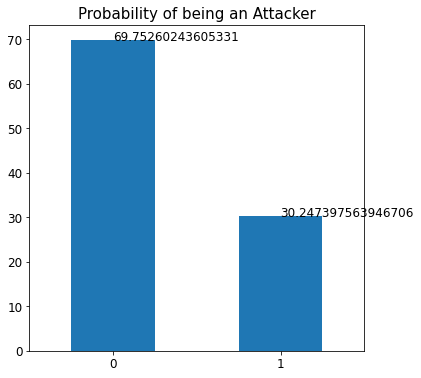

In [43]:
def_cnt = (df.attack.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability of being an Attacker", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [44]:
features = df.drop(['attack'], axis=1)
target = df.attack

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target, test_size=0.2, random_state=42)

In [45]:
lr = LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    std = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, std, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,6), round(std*2,6), params))

In [47]:
parameters = {
    "C" : [0.1, 1, 10]
}

cv = GridSearchCV(lr, parameters, cv = 5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1}

0.699029 (+/-0.002576) for {'C': 0.1}
0.699029 (+/-0.002576) for {'C': 1}
0.699029 (+/-0.002576) for {'C': 10}


In [48]:
cv.best_estimator_

LogisticRegression(C=0.1)

In [49]:
y_pred = cv.best_estimator_.predict(X_test)

In [50]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81    141694
           1       0.23      0.51      0.32     22326

    accuracy                           0.70    164020
   macro avg       0.57      0.62      0.56    164020
weighted avg       0.81      0.70      0.74    164020



In [51]:
print('Accuracy Score: ', accuracy_score(y_pred,y_test))
print('Precision Score: ', precision_score(y_pred, y_test))
print('F1 Score: ', f1_score(y_pred, y_test))
print('Recall Score: ', recall_score(y_pred, y_test))

Accuracy Score:  0.7001097427143032
Precision Score:  0.22927920664355397
F1 Score:  0.3162445439128138
Recall Score:  0.5094956552897967


In [52]:
%%time 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

CPU times: user 1min 41s, sys: 431 ms, total: 1min 41s
Wall time: 1min 42s


RandomForestClassifier(n_estimators=50)

In [53]:
%%time

y_pred = classifier.predict(X_test)

CPU times: user 875 ms, sys: 32 ms, total: 907 ms
Wall time: 914 ms


In [54]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.997756,0.996451,0.99613,0.996291,0.997296


In [55]:
print('Accuracy Score: ', accuracy_score(y_pred,y_test))
print('Precision Score: ', precision_score(y_pred, y_test))
print('F1 Score: ', f1_score(y_pred, y_test))
print('Recall Score: ', recall_score(y_pred, y_test))

Accuracy Score:  0.9977563711742471
Precision Score:  0.9961299685559946
F1 Score:  0.9962906217240546
Recall Score:  0.9964513267198968


In [56]:
%%time 

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

CPU times: user 125 ms, sys: 87.9 ms, total: 213 ms
Wall time: 233 ms


GaussianNB()

In [57]:
%%time 

y_pred =naive_bayes.predict(X_test)

CPU times: user 25.9 ms, sys: 20.5 ms, total: 46.4 ms
Wall time: 46 ms


In [58]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.762541,0.679203,0.407341,0.509261,0.661956


In [59]:
import xgboost

In [60]:
%%time 

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

CPU times: user 3min 27s, sys: 13 s, total: 3min 40s
Wall time: 30.9 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
%%time 

y_pred =xgb.predict(X_test)

CPU times: user 769 ms, sys: 49.6 ms, total: 819 ms
Wall time: 126 ms


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.997945,0.996834,0.996372,0.996603,0.9975
